## Used car price predition

This project was once posted on Kaggle to predict the price of the used car. The following code
uses machine Learning techniques in order to achieve that goal.

In [1]:
# gathering data
import pandas as pd
df = pd.read_csv("car data.csv")
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3018,Toyota Etios VD,2014,509999,157000,Diesel,Individual,Manual,Second Owner
2308,Tata Indica Vista Aqua 1.4 TDI,2011,90000,54000,Diesel,Individual,Manual,First Owner
205,Chevrolet Enjoy 1.3 TCDi LS 8,2013,425000,20000,Diesel,Dealer,Manual,First Owner
2789,Maruti Zen Estilo LXI BS IV,2009,125000,65000,Petrol,Individual,Manual,First Owner
3530,Ford Endeavour 3.0L 4X4 AT,2013,900000,98000,Diesel,Dealer,Automatic,First Owner


In [2]:
df.shape

(4340, 8)

### determining the uniqueness of the given data

In [3]:
print(df.fuel.unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [4]:
print(df.seller_type.unique())

['Individual' 'Dealer' 'Trustmark Dealer']


In [5]:
print(df.transmission.unique())

['Manual' 'Automatic']


In [6]:
print(df.owner.unique())

['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


### determining null values

In [7]:
#Checking missing or null values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


In [9]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

### determining useful columns

In [43]:
final_dataset = df[['year','selling_price','km_driven','fuel',
                    'seller_type','transmission','owner']
                  ]

In [11]:
final_dataset.sample(5)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
64,2005,70000,80000,Diesel,Individual,Manual,First Owner
2800,2017,370000,80000,Diesel,Individual,Manual,First Owner
3742,2013,330000,120000,Diesel,Individual,Manual,Second Owner
2019,2008,50000,70000,Petrol,Individual,Manual,First Owner
1014,2011,120000,20000,Petrol,Individual,Manual,First Owner


### deriving a user defined column

In [12]:
final_dataset['current_year'] = 2020

In [13]:
final_dataset.sample(5)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year
1075,2019,1100000,30000,Diesel,Individual,Manual,First Owner,2020
3244,2013,280000,3240,Petrol,Individual,Manual,Second Owner,2020
2791,2019,490000,13900,Petrol,Individual,Manual,First Owner,2020
2685,2010,1100000,110000,Petrol,Individual,Automatic,First Owner,2020
453,2018,420000,24000,Petrol,Individual,Automatic,First Owner,2020


In [14]:
final_dataset['no_year'] = final_dataset['current_year'] - final_dataset['year']

In [15]:
final_dataset.sample(5)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_year
3108,2016,250000,30000,Petrol,Individual,Manual,Second Owner,2020,4
1826,2016,265000,40000,Petrol,Individual,Manual,First Owner,2020,4
2432,2019,265000,40000,Petrol,Individual,Manual,First Owner,2020,1
570,2017,600000,46507,Diesel,Trustmark Dealer,Manual,First Owner,2020,3
112,2012,600000,60000,Diesel,Individual,Manual,First Owner,2020,8


In [16]:
# drop redundant data
final_dataset.drop(['year','current_year'], axis =1, inplace = True)

In [17]:
final_dataset.sample(5)

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
2464,260000,52895,Diesel,Dealer,Manual,First Owner,9
2456,180000,30375,Petrol,Dealer,Manual,First Owner,11
442,75000,15000,Petrol,Individual,Manual,First Owner,9
2074,450000,35000,Diesel,Individual,Manual,First Owner,3
4243,300000,50000,Petrol,Individual,Manual,First Owner,11


### preprocessing steps

In [18]:
#Converting the categorical features into Dummy variables
final_dataset = pd.get_dummies(final_dataset, drop_first = True)

In [19]:
final_dataset.head()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0


### checking relationship between features

In [20]:
final_dataset.corr()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
no_year,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


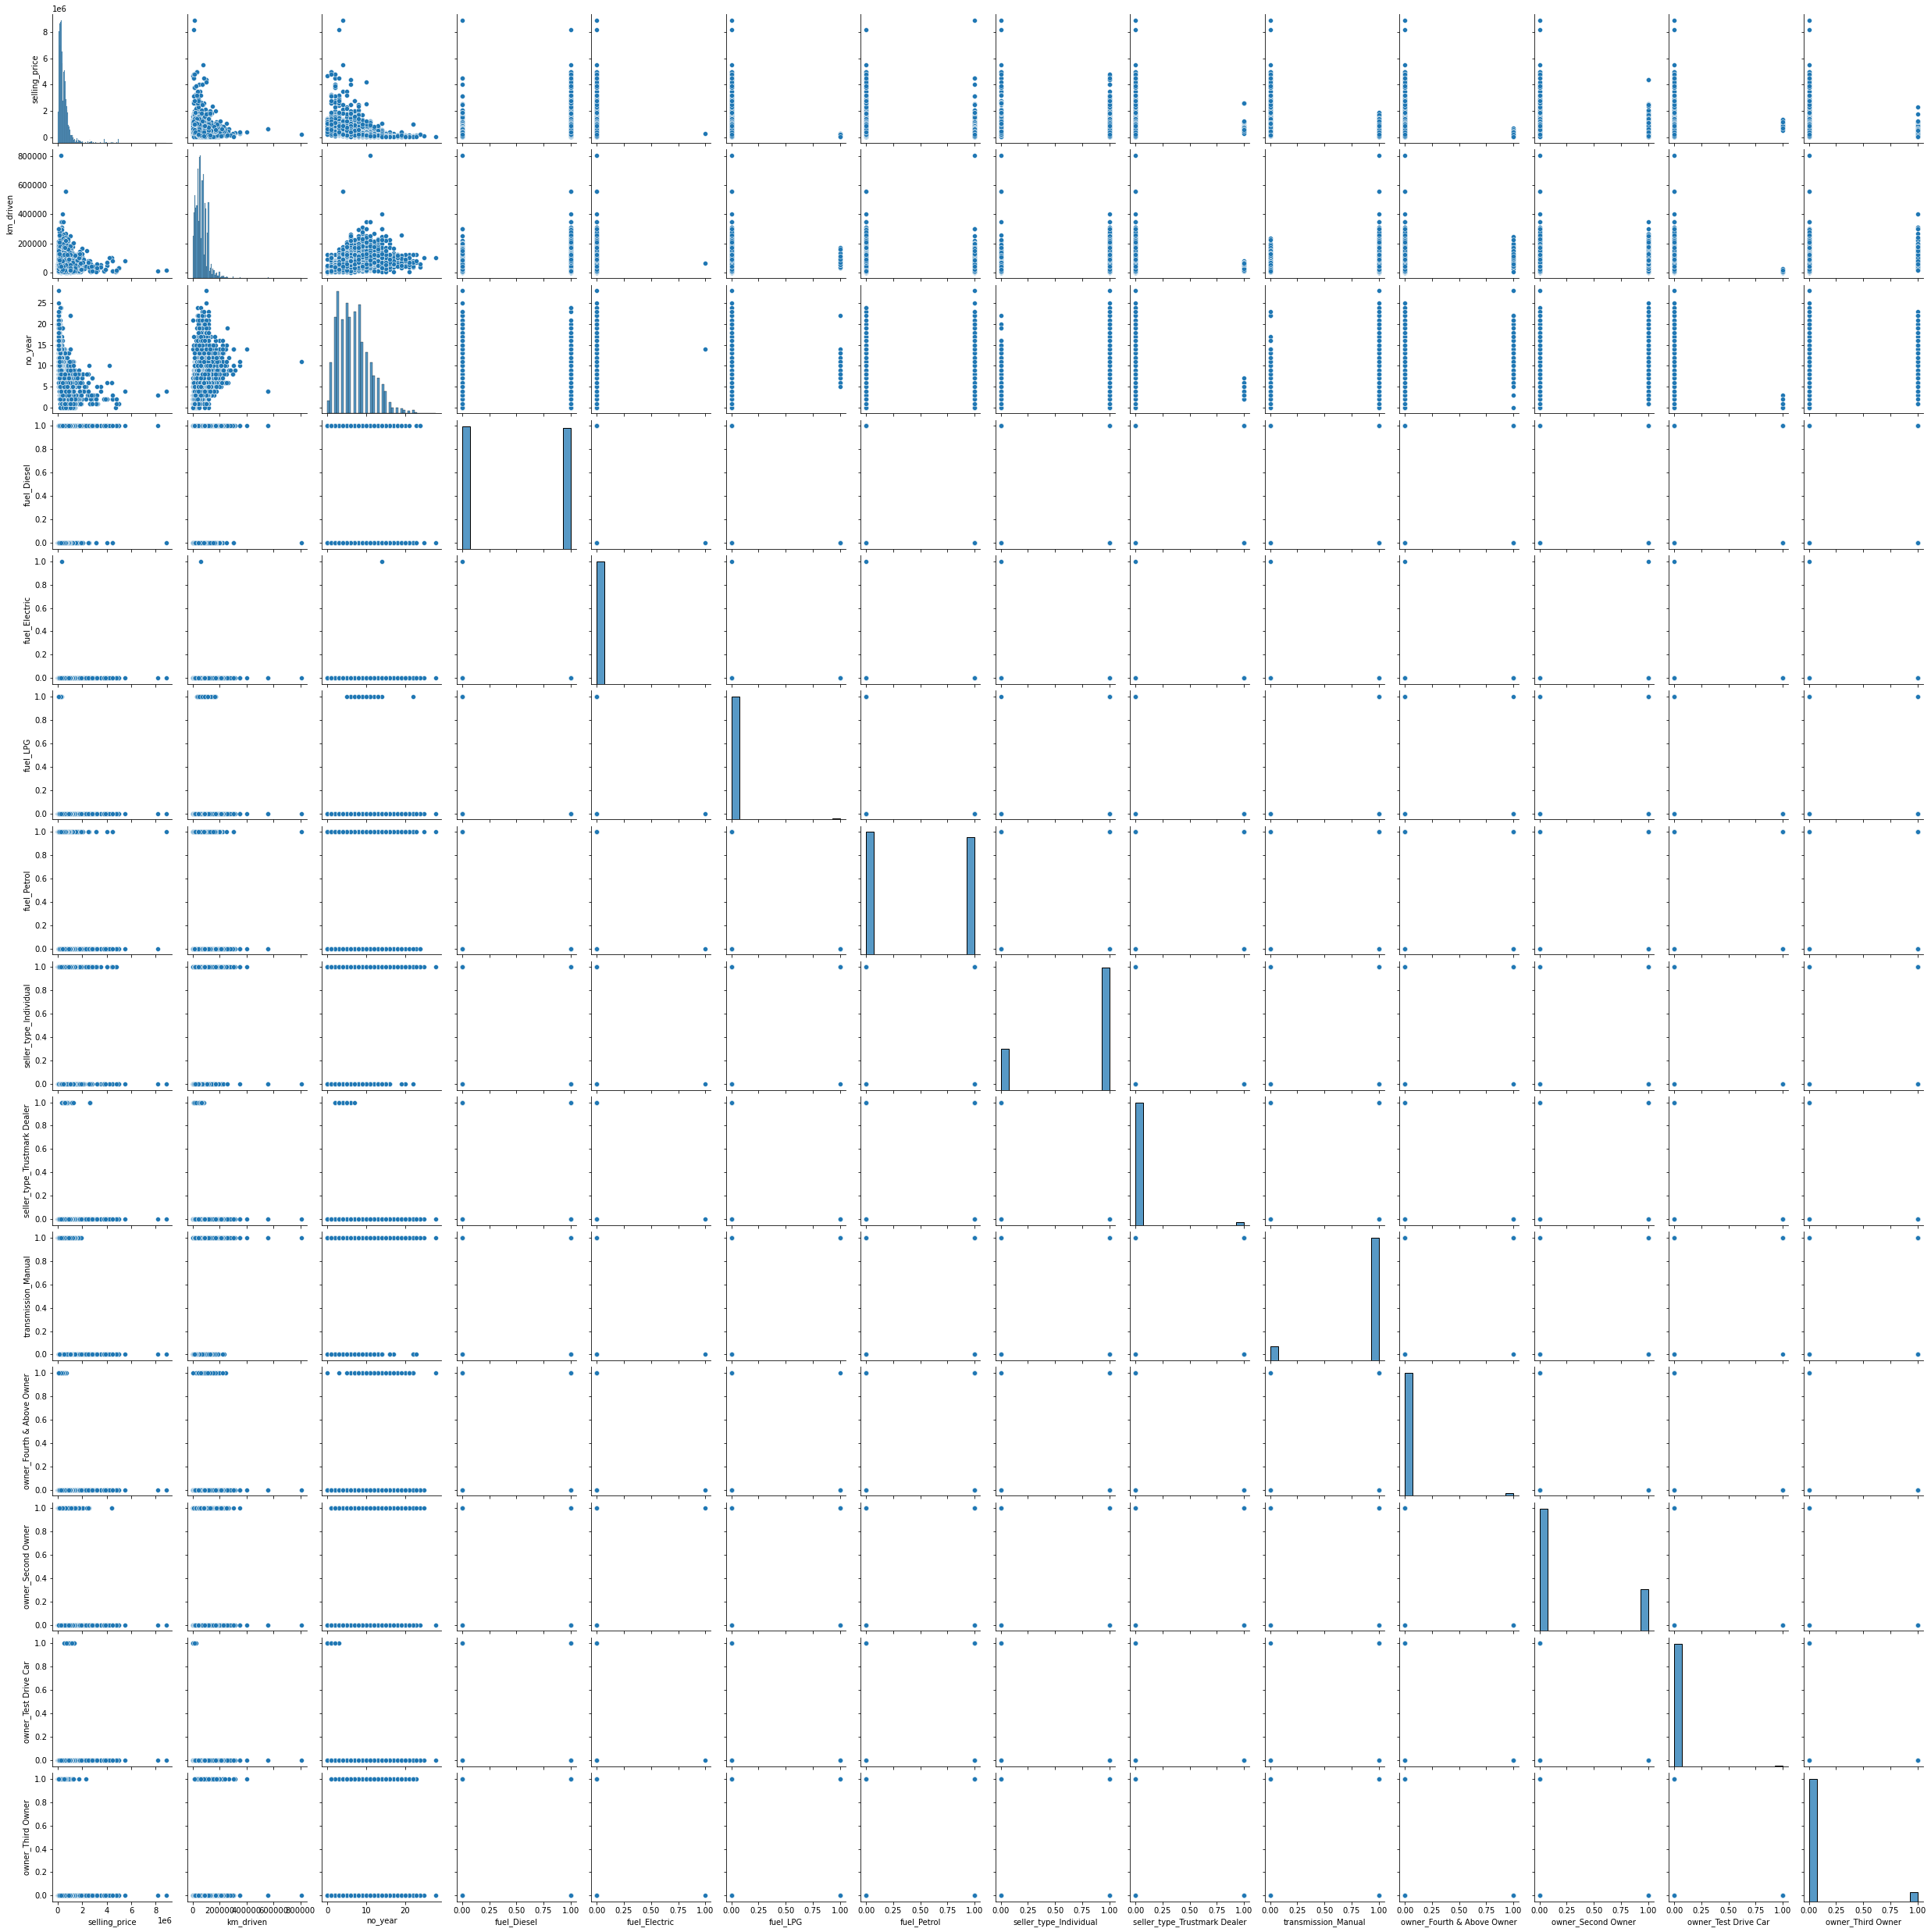

In [21]:
import seaborn as sns
sns.pairplot(final_dataset)

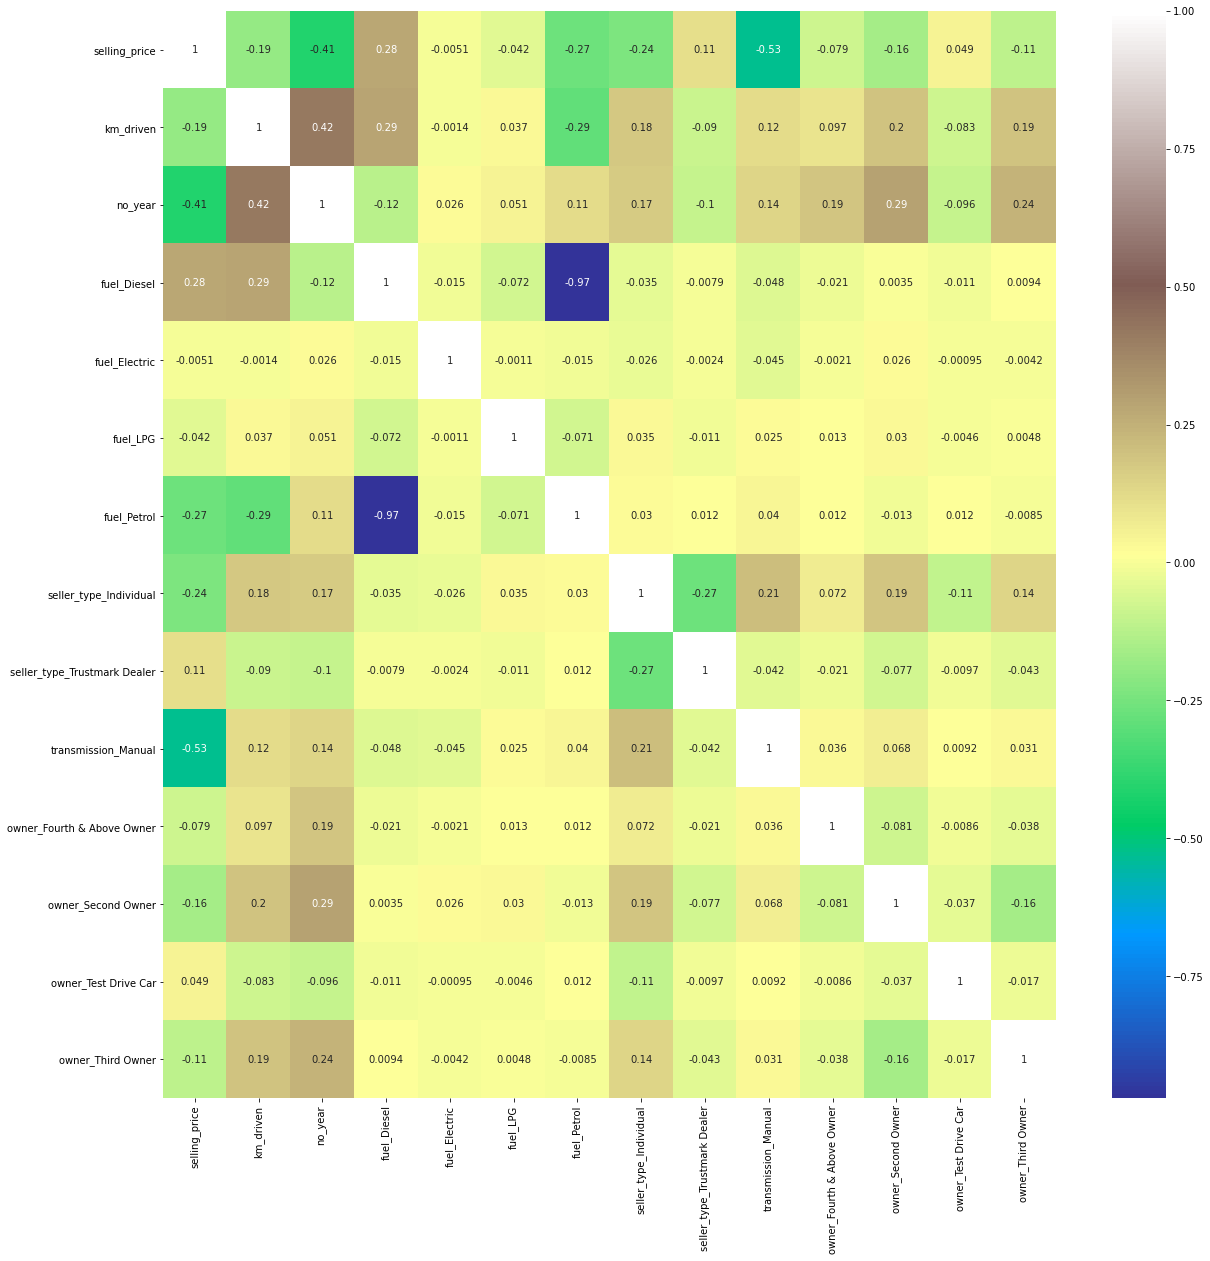

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

corrmat = final_dataset.corr()
top_corr_features= corrmat.index
plt.figure(figsize = (20,20))
g = sns.heatmap(final_dataset[top_corr_features].corr(), annot = True, cmap = 'terrain')

In [23]:
final_dataset.sample(2)

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
2418,450000,50000,5,1,0,0,0,1,0,1,0,0,0,0
3330,310000,30000,5,0,0,0,1,1,0,1,0,1,0,0


## Using iloc to separate independent features from dependent features

In [24]:
## Independent and dependent features separated
X = final_dataset.iloc[:,1:]
y =final_dataset.iloc[:,0]

In [25]:
X.head()

,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [26]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

## Feature Selection

In [27]:
## Determining important features
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [28]:
print(model.feature_importances_)

#Scientific to Real Numbers for visualization
# 0.244385463, 0.250267876, 0.130030780, 0.0000463026965,
# 0.0000256843499,0.000191162197,0.0459240592,0.00808764354
# 0.292828667,0.000775303910,0.0225234265,0.000471183564
# 0.00444244852

[2.46858057e-01 2.46955735e-01 1.29845119e-01 4.37207284e-05
 2.61261166e-05 2.21069142e-04 4.67318198e-02 8.41347700e-03
 2.92829708e-01 8.35254852e-04 2.23054646e-02 5.78006984e-04
 4.35644036e-03]


<AxesSubplot:>

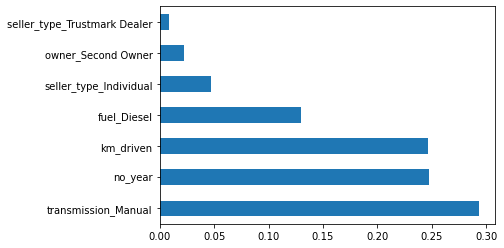

In [29]:
#plot graph of features importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(7).plot(kind ='barh')

## Splitting the train and test data

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [48]:
X_train.sample(5)

,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
3192,74113,9,0,0,0,1,0,0,1,0,0,0,0
1321,80000,13,0,0,0,1,1,0,1,0,1,0,0
3105,75000,14,0,0,0,1,1,0,1,0,0,0,1
650,7900,5,0,0,0,1,1,0,0,0,0,0,0
3967,88473,7,1,0,0,0,0,0,1,0,0,0,0


## Linear Regression algorithm with hyperparameter tuning

In [32]:
## Using Random ForestRegressor which usually doesn't require scaler
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [33]:
## Hyperparameters #we are going to use the hyperparamenters feautures of the RandomForestRegressor
import numpy as np
n_estimators = [int(x) for x in np.linspace (start = 100, stop = 1200, num =12)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [34]:
# Randomized Search CV

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

#Number of features to consider at every split
max_features = ['auto', 'sqrt']

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30, num= 6)]

#max_depth.append(None)

#Minimun number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [35]:
from sklearn.model_selection import RandomizedSearchCV ## Helps us to find the best paramenters

In [36]:
#Create the random grid
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf':min_samples_leaf}
print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [37]:
# Use the random grid to search fo the best hyperparameters
#First create the base mode to tune

rf =RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               scoring = 'neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose = 2, 
                               random_state = 1234,n_jobs =-1)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   1.8s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   1.7s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   1.7s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   1.9s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   2.2s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=400, min_samples_spl

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=1234, scoring='neg_mean_squared_error',
                   verbose=2)

## Here is the predicted price

In [42]:
predictions = rf_random.predict(X_test)
predictions.mean()

540829.509626333

C:\Users\domif\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

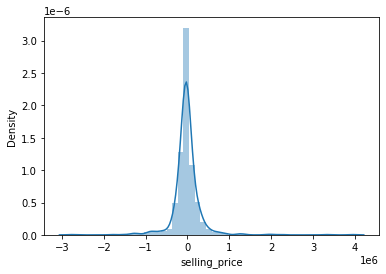

In [39]:
sns.distplot(y_test - predictions)

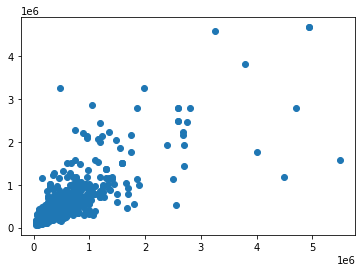

In [40]:
plt.scatter(y_test, predictions)

In [41]:
import pickle
#open a file, where you want to store data
file = open('random_forest_regression_model.pkl', 'wb')

#dump information to that file
pickle.dump(rf_random, file)

In [ ]:
# credits
# I followed Krish Naik end to end implementaion youtube tutorial
# https://www.youtube.com/watch?v=p_tpQSY1aTs